# Word2Vec Embedding

In [2]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/envs/tensorflow_optimized/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
dataset = pd.read_csv('train.csv')
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
x_text = np.array(dataset.iloc[1:,1])
y = np.array(dataset.iloc[1:,2:], dtype='float32')

In [14]:
from nltk.corpus import stopwords
import string

def normalize(x_text):
    stop = stopwords.words('english')
    res = [' '.join([t for t in doc.split() if t not in string.punctuation and t not in  stop]) for doc in x_text]
    return res

In [15]:
def tokenize_data(x_text):
    tokenizer = Tokenizer(lower=True)
    tokenizer.fit_on_texts(x_text)
    x_tokenized_doc = []
    for doc in x_text:
        tk_doc = tokenizer.texts_to_sequences(doc)
        x_tk_optimized = [x_doc for x_doc in tk_doc if len(x_doc)>0]
        x_tokenized_doc.append(x_tk_optimized)
    return x_tokenized_doc, tokenizer

In [16]:
x_text = normalize(x_text)
x_tokenized, x_tk= tokenize_data(x_text)
index_to_words = {id: word for word, id in x_tk.word_index.items()}
max_vocab = len(set([word for word, id in x_tk.word_index.items()]))
max_len = max([len(item) for item in x_tokenized])
print(max_len)
print(max_vocab)

4961
209630


In [72]:
words_to_index = {word: id for word, id in x_tk.word_index.items()}

In [17]:
x_array = []
for x_doc in x_tokenized:
    x_list = [x_item[0] for x_item in x_doc]
    x_array.append(x_list)


x_all =pad_sequences(x_array, maxlen=2000, dtype='int32', padding='post', truncating='post', value=0.0)
print(x_all)
x = np.array(x_all)

[[ 543 1211   30 ...    0    0    0]
 [1666  246 1931 ...    0    0    0]
 [ 930 1197  828 ...    0    0    0]
 ...
 [ 306  511    1 ...    0    0    0]
 [  30  951  543 ...    0    0    0]
 [  30  951  543 ...    0    0    0]]


In [63]:
print(x.shape)
print(y.shape[1])

(159570, 2000)
6


In [35]:
learning_rate=0.001

model = Sequential()
model.add(Embedding(max_vocab, 100, input_length=2000))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2000, 100)         20963000  
_________________________________________________________________
dense_1 (Dense)              (None, 2000, 64)          6464      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2000, 64)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 2000, 32)          2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 2000, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 384006    
Total para

In [65]:
num_epoch=50
checkpoint = ModelCheckpoint(filepath='best_model_1.hdf5', save_best_only=True)
hist = model.fit(x, y, batch_size=200, epochs=num_epoch, validation_split=0.2, callbacks=[checkpoint], shuffle=True, verbose=2)

Train on 127656 samples, validate on 31914 samples
Epoch 1/50
 - 139s - loss: 0.3022 - acc: 0.9792 - val_loss: 0.3023 - val_acc: 0.9925
Epoch 2/50
 - 138s - loss: 0.2963 - acc: 0.9588 - val_loss: 0.3023 - val_acc: 0.9872
Epoch 3/50
 - 138s - loss: 0.2942 - acc: 0.9681 - val_loss: 0.3055 - val_acc: 0.8769
Epoch 4/50
 - 138s - loss: 0.2911 - acc: 0.9555 - val_loss: 0.3061 - val_acc: 0.9862
Epoch 5/50
 - 138s - loss: 0.2893 - acc: 0.9472 - val_loss: 0.3038 - val_acc: 0.9754
Epoch 6/50
 - 138s - loss: 0.2881 - acc: 0.9444 - val_loss: 0.3015 - val_acc: 0.9737
Epoch 7/50
 - 138s - loss: 0.2862 - acc: 0.9340 - val_loss: 0.3036 - val_acc: 0.9527
Epoch 8/50
 - 138s - loss: 0.2850 - acc: 0.9351 - val_loss: 0.3034 - val_acc: 0.9567
Epoch 9/50
 - 138s - loss: 0.2838 - acc: 0.9316 - val_loss: 0.3063 - val_acc: 0.8904
Epoch 10/50
 - 138s - loss: 0.2832 - acc: 0.9270 - val_loss: 0.3072 - val_acc: 0.9392
Epoch 11/50
 - 138s - loss: 0.2817 - acc: 0.9204 - val_loss: 0.3090 - val_acc: 0.9620
Epoch 12/50


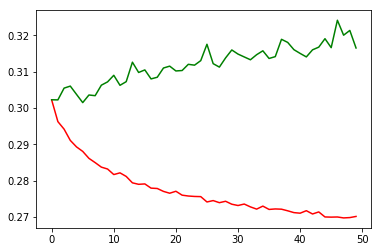

In [66]:
train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['acc']
val_acc    = hist.history['val_acc']
xc         = range(num_epoch)
plt.figure()
plt.plot(xc, train_loss, color='red')
plt.plot(xc, val_loss, color='green')
plt.show()

In [6]:
test_dataset = pd.read_csv('test.csv')
test_dataset.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
x_text_test = np.array(test_dataset.iloc[1:,1])

In [9]:
x_text_test = normalize(x_text_test)

In [23]:
x_tokenized_doc_test = []
for doc in x_text_test:
    tk_doc = x_tk.texts_to_sequences(doc)
    x_tk_optimized = [x_doc for x_doc in tk_doc if len(x_doc)>0]
    x_tokenized_doc_test.append(x_tk_optimized)

In [31]:
x_tokenized_doc_test[:1]

[[[769],
  [828],
  [1197],
  [930],
  [828],
  [769],
  [335],
  [472],
  [1666],
  [246],
  [472],
  [1],
  [472],
  [1593],
  [246],
  [769],
  [1],
  [951],
  [246],
  [1],
  [306],
  [1],
  [930],
  [1197]]]

In [25]:
x_array_test = []
for x_doc in x_tokenized_doc_test:
    x_list = [x_item[0] for x_item in x_doc]
    x_array_test.append(x_list)

In [33]:
x_array_test[0]

[769,
 828,
 1197,
 930,
 828,
 769,
 335,
 472,
 1666,
 246,
 472,
 1,
 472,
 1593,
 246,
 769,
 1,
 951,
 246,
 1,
 306,
 1,
 930,
 1197]

In [29]:
len(x_array_test)

153163

In [36]:
model.load_weights('best_model_1.hdf5')

In [47]:
final_sub = []
for i in range(10):
    x_all_test =pad_sequences([x_array_test[i]], maxlen=2000, dtype='int32', padding='post', truncating='post', value=0.0)
    x_test = np.array(x_all_test)
    probab = model.predict_proba(x_test)
    print(test_dataset.iloc[i][0])
    print(test_dataset.iloc[i][1])
    print(probab)

00001cee341fdb12
Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,
[[0.41404307 0.05159625 0.27077267 0.01521561 0.21486457 0.03350782]]
0000247867823ef7
== From RfC == 

 The title is fine as it is, IMO.
[[0.50865996 0.02572418 0.22983216 0.00911316 0.19865124 0.02801932]]
00013b17ad220c46
" 

 == Sources == 

 * Zawe Ashton on Lapland —  /  "
[[0.39953944 0.05518452 0.25156254 0.00747369 0.26051563 0.02572422]]
00017563c3f7919a
:If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message.
[[0.49654445 0.02509513 0.19646992 0.01216